# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Zahran Fikri
- **Email:** zahranfikri2003@gmail.com
- **ID Dicoding:** zahran_fikri

## Menentukan Pertanyaan Bisnis

- Bagaimana intensitas jumlah pengguna sepeda dalam seminggu?
- Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Melakukan load file csv yaitu `day.csv`menjadi sebuah Dataframe

In [2]:
day_df = pd.read_csv('/data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('/data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai tabel *`day_df`*

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Memeriksa missing value pada tabel *`day_df`*

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Memeriksa jumlah duplikasi data pada tabel *`day_df`*

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Menghitung jumlah nilai unik dalam setiap kolom dari tabel *`day_df`*

In [7]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan proses Assessing data ini diketahui bahwa pada tabel `day_df` tidak terdapat data yang mengalami duplikasi, data hilang *(missing value)*, ataupun *invalid value*.

Menilai tabel *`hour_df`*

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Memeriksa missing value pada tabel *`hour_df`*

In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Memeriksa jumlah duplikasi data pada tabel *`hour_df`*

In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Menghitung jumlah nilai unik dalam setiap kolom dari tabel *`hour_df`*

In [12]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada tabel `hour_df` setelah proses Assessing data ini diketahui bahwa tabel ini juga tidak terdapat data yang mengalami duplikasi, data hilang *(missing value)*, ataupun *invalid value*.

### Cleaning Data

* **Membersihkan tabel `day_df`**

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Kolom `dteday` pada tabel `day_df` bertipe *object* maka tipe datanya perlu diubah menjadi *datetime*

Mengubah tipe data pada kolom `dteday` yang bertipe data *object* menjadi tipe data *datetime*

In [15]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [16]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Beberapa nama kolom pada tabel `day_df` terlihat sulit untuk dipahami sehingga perlu diganti dengan nama yang lebih mudah dimengerti

Mengganti nama beberapa kolom pada tabel `day_df`

In [17]:
day_df.rename(columns={
    'instant' : 'index',
    'dteday' : 'datetime',
    'yr' : 'year',
    'mnth' : 'month',
    'atemp' : 'feel_temp',
    'hum' : 'humidity',
    'cnt' : 'count',
},inplace=True)

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       731 non-null    int64         
 1   datetime    731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  feel_temp   731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

Melakukan mapping data pada kolom `season` yang sebelumnya berbentuk angka menjadi data kategori musim

In [18]:
day_df['season'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day_df.head()

,index,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,feel_temp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah data pada kolom `year` menjadi data tahun yang sesuai dengan kolom `datetime` (**Jika bernilai 0 maka menjadi tahun 2011 dan jika bernilai 1 menjadi tahun 2012**)

In [19]:
day_df['year'] = day_df['datetime'].dt.year
day_df.head()

,index,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,feel_temp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah data pada kolom `month` menjadi data nama bulan yang sesuai dengan kolom `datetime`

In [20]:
day_df['month'] = day_df['datetime'].dt.month_name()
day_df.head()

,index,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,feel_temp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah data pada kolom `weekday`yang berbentuk angka menjadi data nama hari dalam seminggu

In [21]:
day_df['weekday'] = day_df['datetime'].dt.day_name()
day_df.head()

,index,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,feel_temp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Melakukan mapping data pada kolom `weathersit`dari berbentuk angka menjadi data kategori cuaca

In [22]:
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Rain + Scattered clouds', 4: 'Heavy Rain'
    })
day_df.head()

,index,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,feel_temp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


*   **Membersihkan tabel `hour_df`**

Pada tabel `hour_df` ini merupakan tabel yang sama dengan `day_df` hanya saja dengan tambahan *field* hr sehingga proses cleaning yang dilakukan hampir sama

In [23]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [24]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Melakukan *rename* nama kolom pada tabel `hour_df`

In [25]:
hour_df.rename(columns={
    'instant' : 'index',
    'dteday' : 'datetime',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'atemp' : 'feel_temp',
    'hum' : 'humidity',
    'cnt' : 'count',
},inplace=True)

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   datetime    17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  feel_temp   17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  count       17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Mapping data dan mengubah bentuk format data pada tabel `hour_df`

In [26]:
hour_df['datetime'] = pd.to_datetime(hour_df['datetime'])
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
    })

hour_df['year'] = hour_df['datetime'].dt.year
hour_df['month'] = hour_df['datetime'].dt.month_name()
hour_df['weekday'] = hour_df['datetime'].dt.day_name()
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Rain + Scattered clouds', 4: 'Heavy Rain'
    })
hour_df.head()

,index,datetime,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,feel_temp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore tabel `day_df`

In [27]:
day_df.sample(5)

,index,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,feel_temp,humidity,windspeed,casual,registered,count
69,70,2011-03-11,Spring,2011,March,0,Friday,1,Mist + Cloudy,0.316522,0.305000,0.649565,0.232970,247,1730,1977
154,155,2011-06-04,Summer,2011,June,0,Saturday,0,Clear,0.635000,0.594696,0.456250,0.123142,1869,3473,5342
639,640,2012-10-01,Winter,2012,October,0,Monday,1,Mist + Cloudy,0.520833,0.512000,0.649167,0.090804,763,6015,6778
458,459,2012-04-03,Summer,2012,April,0,Tuesday,1,Clear,0.466667,0.461483,0.396667,0.100133,1348,5424,6772
442,443,2012-03-18,Spring,2012,March,0,Sunday,0,Mist + Cloudy,0.472500,0.464000,0.810000,0.126883,2207,3685,5892


In [28]:
day_df.describe()

,index,year,holiday,workingday,temp,feel_temp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011.500684,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,2011.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012.000000,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [29]:
day_df.index.is_unique

True

In [30]:
day_df.head()

,index,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,feel_temp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [31]:
day_df.groupby(by='datetime').agg({
    'count':'sum'
}).reset_index()

,datetime,count
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
726,2012-12-27,2114
727,2012-12-28,3095
728,2012-12-29,1341
729,2012-12-30,1796


In [32]:
day_df.groupby(by='weekday').agg({
    'index' : 'nunique',
    'count':['min','max','sum','mean','std']
}).reset_index()

weekday   index count                                        
             nunique   min   max     sum         mean          std
0     Friday     104  1167  8362  487790  4690.288462  1874.624870
1     Monday     105    22  7525  455503  4338.123810  1793.074013
2   Saturday     105   627  8714  477807  4550.542857  2196.693009
3     Sunday     105   605  8227  444027  4228.828571  1872.496629
4   Thursday     104   431  7804  485395  4667.259615  1939.433317
5    Tuesday     104   683  7767  469109  4510.663462  1826.911642
6  Wednesday     104   441  8173  473048  4548.538462  2038.095884

In [33]:
day_df.groupby(by='month').agg({
    'index' : 'nunique',
    'count':['min','max','sum','mean','std']
}).reset_index()

month   index count                                        
              nunique   min   max     sum         mean          std
0       April      60   795  7460  269094  4484.900000  1776.160778
1      August      62  1115  7865  351194  5664.419355  1494.516146
2    December      62   441  6606  211036  3403.806452  1549.639353
3    February      57  1005  5062  151352  2655.298246  1145.313307
4     January      62   431  4521  134933  2176.338710  1161.674370
5        July      62  3285  8173  344948  5563.677419  1273.751871
6        June      60  3767  8120  346342  5772.366667  1240.400031
7       March      62   605  8362  228920  3692.258065  1899.301812
8         May      62  2633  8294  331686  5349.774194  1298.711561
9    November      60  1495  6852  254831  4247.183333  1285.712709
10    October      62    22  8156  322352  5199.225806  1988.392517
11  September      60  1842  8714  345991  5766.516667  1810.130649

In [34]:
day_df.groupby(by='year').agg({
    'index' : 'nunique',
    'count':['min','max','sum','mean','std']
}).reset_index()

year   index count                                         
        nunique   min   max      sum         mean          std
0  2011     365   431  6043  1243103  3405.761644  1378.753666
1  2012     366    22  8714  2049576  5599.934426  1788.667868

In [35]:
day_df.groupby(by='season').agg({
    'index' : 'nunique',
    'count':['sum','mean','std']
}).reset_index()

season   index    count                          
          nunique      sum         mean          std
0    Fall     188  1061129  5644.303191  1459.800381
1  Spring     181   471348  2604.132597  1399.942119
2  Summer     184   918589  4992.331522  1695.977235
3  Winter     178   841613  4728.162921  1699.615261

In [36]:
day_df.groupby(by='weathersit').agg({
    'index' : 'nunique',
    'count':['sum','mean','std']
}).reset_index()

weathersit   index    count                          
                                 nunique      sum         mean          std
0                          Clear     463  2257952  4876.786177  1879.483989
1  Light Rain + Scattered clouds      21    37869  1803.285714  1240.284449
2                  Mist + Cloudy     247   996858  4035.862348  1809.109918

In [37]:
day_df.groupby(by=['year','month']).agg({
    'index' : 'nunique',
    'count':['sum','mean','std']
})

index   count                          
               nunique     sum         mean          std
year month                                              
2011 April          30   94870  3162.333333  1042.093593
     August         31  136691  4409.387097   809.852401
     December       31   87323  2816.870968   958.763187
     February       28   48215  1721.964286   398.508839
     January        31   38189  1231.903226   372.432665
     July           31  141341  4559.387097   680.090762
     June           30  143512  4783.733333   444.447812
     March          31   64045  2065.967742   550.971716
     May            31  135821  4381.322581   572.927883
     November       30  102167  3405.566667   788.249290
     October        31  123511  3984.225806  1103.481844
     September      30  127418  4247.266667   965.377251
2012 April          30  174224  5807.466667  1308.938916
     August         31  214503  6919.451613   794.059017
     December       31  123713  3990.741935  1803.227864
     February       29  103137  3556.448276   870.724640
     January        31   96744  3120.774194   872.852134
     July           31  203607  6567.967742   867.183736
     June           30  202830  6761.000000   954.204995
     March          31  164875  5318.548387  1251.162682
     May            31  195865  6318.225806  1078.403997
     November       30  152664  5088.800000  1129.731198
     October        31  198841  6414.225806  1941.819400
     September      30  218573  7285.766667   979.160925

In [38]:
day_df.groupby(by=['year','season']).agg({
    'index' : 'nunique',
    'count':['sum','mean','std']
})

index   count                          
            nunique     sum         mean          std
year season                                          
2011 Fall        94  419650  4464.361702   798.348077
     Spring      90  150000  1666.666667   614.012663
     Summer      92  347316  3775.173913  1138.901028
     Winter      89  326137  3664.460674   983.006128
2012 Fall        94  641479  6824.244681   912.756191
     Spring      91  321348  3531.296703  1341.203270
     Summer      92  571273  6209.489130  1221.345569
     Winter      89  515476  5791.865169  1598.520901

In [39]:
day_df.groupby(by=['season', 'weathersit']).agg({
    'index' : 'nunique',
    'count':['sum','mean','std']
})

index   count                          
                                     nunique     sum         mean          std
season weathersit                                                             
Fall   Clear                             136  799443  5878.257353  1356.647125
       Light Rain + Scattered clouds       4   11007  2751.750000  1199.339923
       Mist + Cloudy                      48  250679  5222.479167  1431.160502
Spring Clear                             111  312036  2811.135135  1409.960622
       Light Rain + Scattered clouds       4    3739   934.750000   826.272100
       Mist + Cloudy                      66  155573  2357.166667  1313.332082
Summer Clear                             113  626986  5548.548673  1467.655078
       Light Rain + Scattered clouds       3    3507  1169.000000   461.679543
       Mist + Cloudy                      68  288096  4236.705882  1579.038070
Winter Clear                             103  519487  5043.563107  1595.693909
       Light Rain + Scattered clouds      10   19616  1961.600000  1329.287378
       Mist + Cloudy                      65  302510  4654.000000  1523.445365

### Explore tabel `hour_df`

In [40]:
hour_df.groupby(by='weathersit').agg({
    'index' : 'nunique',
    'count':['sum','mean','std']
})

index    count                        
                              nunique      sum        mean         std
weathersit                                                            
Clear                           11413  2338173  204.869272  189.487773
Heavy Rain                          3      223   74.333333   77.925178
Light Rain + Scattered clouds    1419   158331  111.579281  133.781045
Mist + Cloudy                    4544   795952  175.165493  165.431589

In [41]:
hour_df.groupby(by=['season', 'weathersit']).agg({
    'index' : 'nunique',
    'count':['sum','mean','std']
})

index   count                        
                                     nunique     sum        mean         std
season weathersit                                                           
Fall   Clear                            3280  801941  244.494207  201.732720
       Light Rain + Scattered clouds     269   46256  171.955390  175.871513
       Mist + Cloudy                     947  212932  224.848997  185.406665
Spring Clear                            2665  325278  122.055535  127.384258
       Heavy Rain                          3     223   74.333333   77.925178
       Light Rain + Scattered clouds     369   21642   58.650407   74.793446
       Mist + Cloudy                    1205  124205  103.074689  106.154745
Summer Clear                            2859  664463  232.410983  198.312457
       Light Rain + Scattered clouds     406   46763  115.179803  130.760396
       Mist + Cloudy                    1144  207363  181.261364  164.832349
Winter Clear                            2609  546491  209.463779  190.891851
       Light Rain + Scattered clouds     375   43670  116.453333  127.471365
       Mist + Cloudy                    1248  251452  201.483974  173.833617

Explorasi tabel `hour_df` diketahui memiliki data yang sedikit berbeda dari tabel `day_df` yaitu pada tabel `weathersit` menyatakan terdapat 223 pengguna sepeda pada cuaca *Heavy Rain*

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana intensitas jumlah pengguna sepeda dalam seminggu?


Untuk menjawab pertanyaan ini maka akan digunakan tabel `day_df` yang memuat data pengguna sepeda per hari sehingga dapat diperoleh intensitas penggunaan sepeda selama seminggu

In [42]:
# memfilter data berdasarkan weekday dan menyimpan pada tabel weekday_df
weekday_df = day_df.groupby(by='weekday').agg({
    'count': 'sum'
}).reset_index()

# Mendefinisikan urutan hari sebagai kategori
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Mengubah kolom weekday menjadi tipe data kategorikal dengan urutan yang ditentukan
weekday_df['weekday'] = pd.Categorical(weekday_df['weekday'], categories=weekday_order, ordered=True)

# Mengurutkan DataFrame berdasarkan kolom weekday
weekday_df.sort_values(by='weekday')

,weekday,count
1,Monday,455503
5,Tuesday,469109
6,Wednesday,473048
4,Thursday,485395
0,Friday,487790
2,Saturday,477807
3,Sunday,444027


Dari hasil tersebut penggunaan sepeda mencapai puncaknya pada hari jumat *(Friday)*

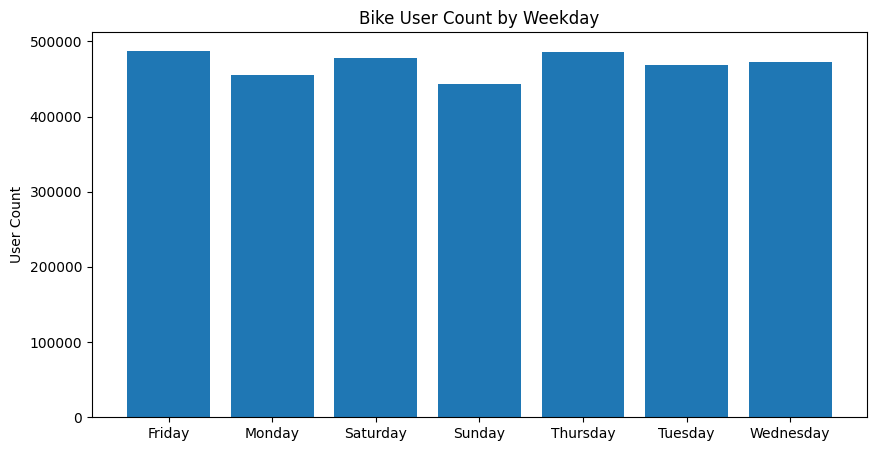

In [43]:
plt.figure(figsize=(10,5))
plt.bar(weekday_df['weekday'], weekday_df['count'])
plt.title('Bike User Count by Weekday')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('User Count')
plt.show()

Berdasarkan hasil visualisasi data diatas dapat disimpulkan bahwa intensitas pengguna sepeda mencapai puncaknya pada hari Jumat *(Friday)* dan intensitas terendah terjadi pada hari Minggu *(Sunday)*

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda?

Untuk menjawab pertanyaan ini makan digunakan tabel `hour_df` untuk intensitas pengguna sepeda terhadap perubahan cuaca setiap jam

In [44]:
weather_df = hour_df.groupby(by='weathersit').agg({
    'count': 'sum'
}).reset_index()
weather_df

,weathersit,count
0,Clear,2338173
1,Heavy Rain,223
2,Light Rain + Scattered clouds,158331
3,Mist + Cloudy,795952


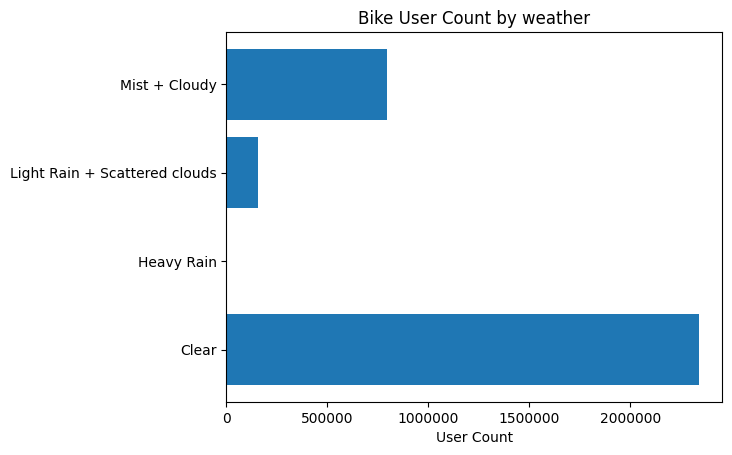

In [45]:
plt.barh(weather_df['weathersit'], weather_df['count'])
plt.title('Bike User Count by weather')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('User Count')
plt.show()

Dari visualisasi diatas dapat disimpulkan bahwa jumlah pengguna sepeda paling banyak terjadi pada saat cuaca cerah *(Clear)* dan paling sedikit saat cuaca hujan deras *(Heavy Rain)*

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan analisis data yang dilakukan, intensitas penggunaan sepeda dalam seminggu sangat tinggi yang dapat dilihat pada grafik visualisasi data. Jumlah pengguna sepeda tertinggi terjadi pada hari Jumat (Friday), menunjukkan bahwa banyak orang menggunakan sepeda sebagai sarana transportasi utama menjelang akhir pekan, mungkin karena alasan seperti kegiatan rekreasi. Sebaliknya, intensitas penggunaan sepeda mengalami penurunan pada hari Minggu (Sunday), yang dapat disebabkan oleh faktor-faktor seperti libur akhir pekan dengan keluarga atau preferensi untuk beristirahat di rumah.

- Conclution pertanyaan 2 : Berdasarkan analisis data, dapat disimpulkan bahwa jumlah pengguna sepeda paling banyak terjadi pada saat cuaca cerah (Clear). Hal ini menunjukkan bahwa kondisi cuaca yang cerah cenderung meningkatkan minat dan kesediaan orang untuk menggunakan sepeda,dimana kondisi ini nyaman dan aman bagi pengguna sepeda.Sementara itu, penggunaan sepeda paling sedikit terjadi saat cuaca hujan deras (Heavy Rain), karena kondisi cuaca yang buruk seperti hujan deras dapat menjadi hambatan bagi pengguna sepeda, baik dari segi kenyamanan maupun keamanan.